In [5]:
import matplotlib.pyplot as plt
import numpy as np
from orbsim.r3b_2d.analyticals import *
from orbsim.r3b_2d.simulators import launch_sim
from orbsim.plotting import orbitplot2d, orbitplot_non_inertial
from orbsim import *
from orbsim.r3b_2d import *

In [25]:
N=4
psis=[]
paths=[]
examples=[
         ["hohmann", [-2.086814820119193, -0.000122173047640, 3.111181716545691],5],
         ["long_leto",[3.794182930145708, 0.023901745288554, 3.090702702702703],200],
         ["short_leto",[-0.138042744751570, -0.144259374836607, 3.127288444444444],41],
         ["3-day_hohmann",[-2.272183066647597, -0.075821466029764, 3.135519748743719],3],
         ["1-day_hohmann",[-2.277654673852600, 0.047996554429844, 3.810000000000000],1]
]#[title, psi, duration]
for title, psi, duration in examples:
    for i in range(N):
        permute_psi = psi
        permute_psi[2] = psi[2]+i*1e-1
        path = launch_sim(psi, max_iter=1e5, duration=duration)
        psis.append(psi)
        paths.append(path) 


C:\Users\oisin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


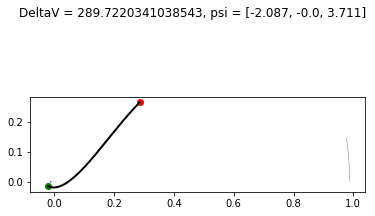

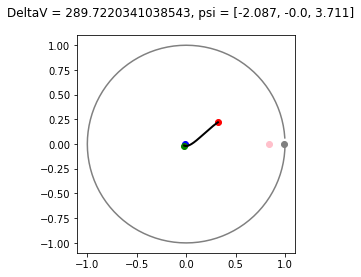

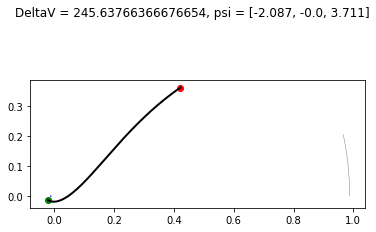

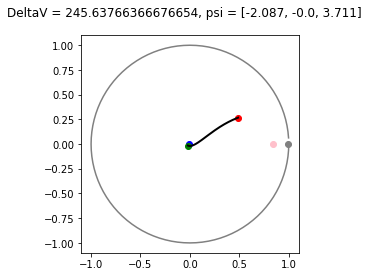

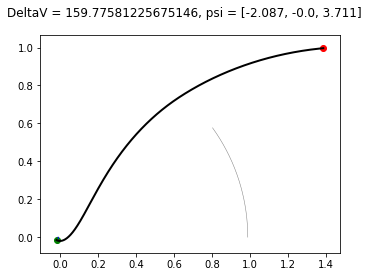

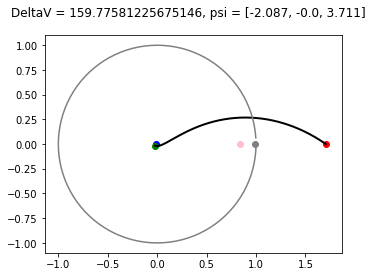

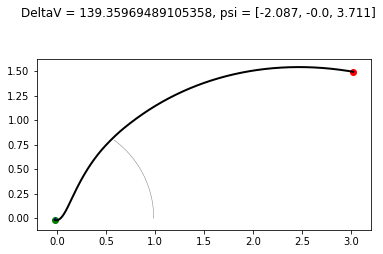

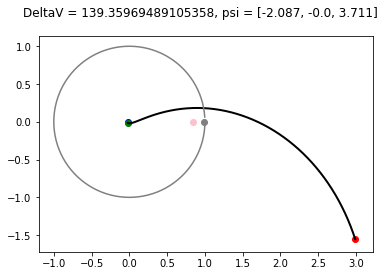

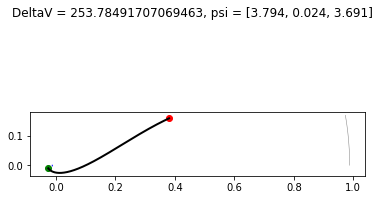

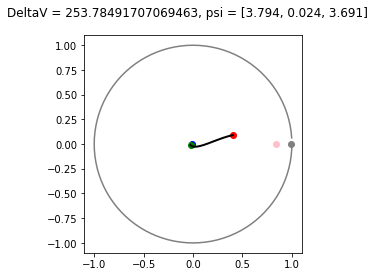

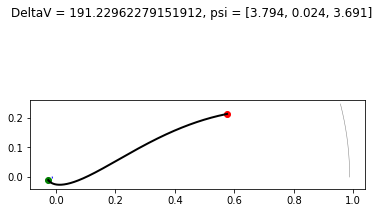

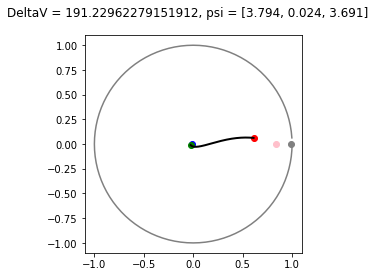

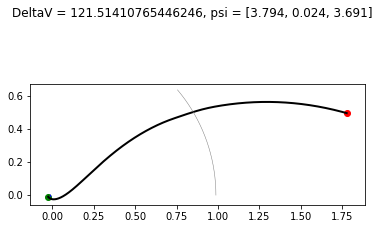

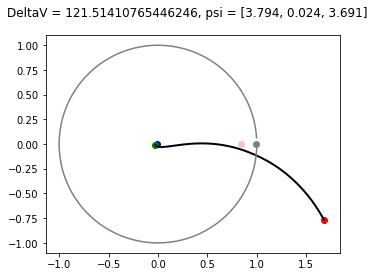

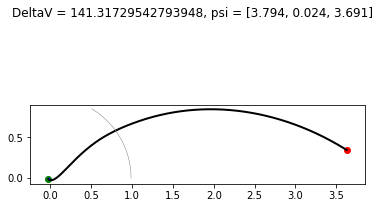

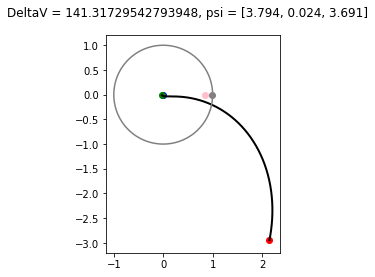

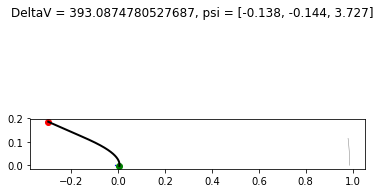

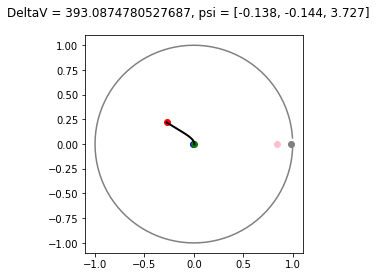

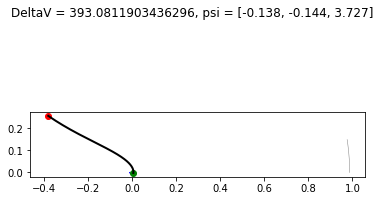

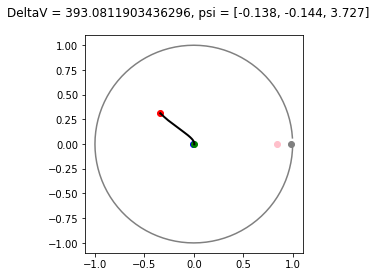

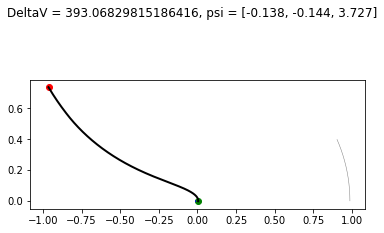

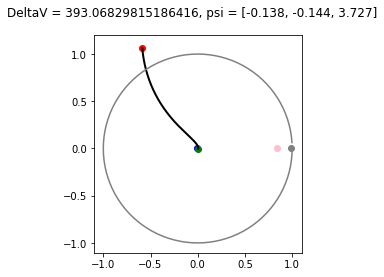

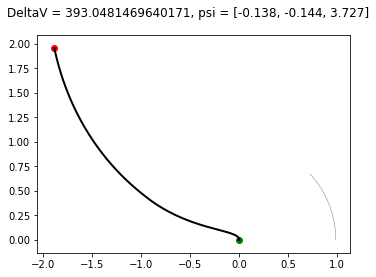

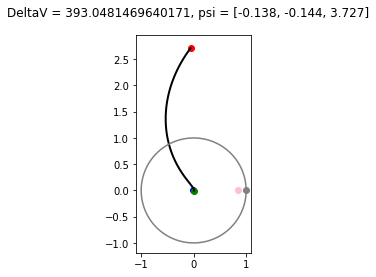

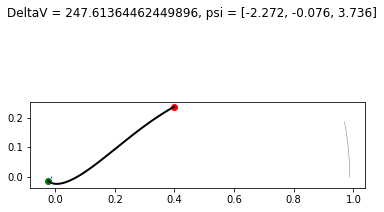

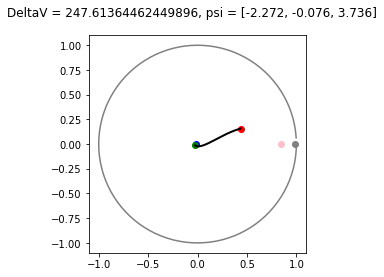

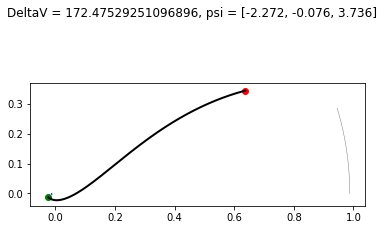

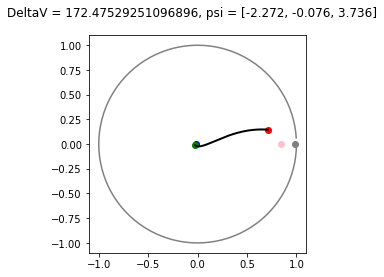

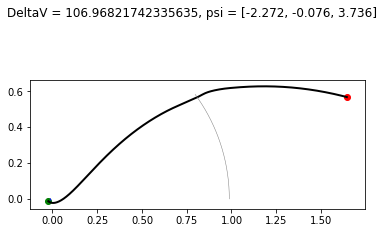

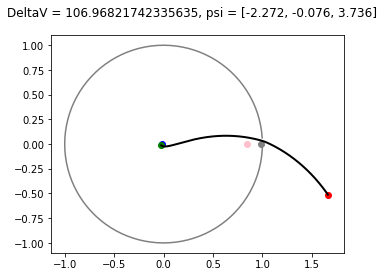

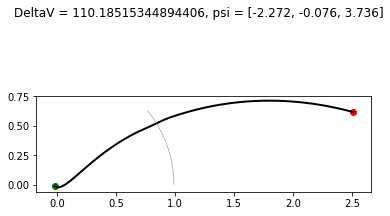

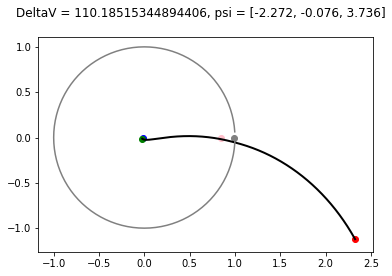

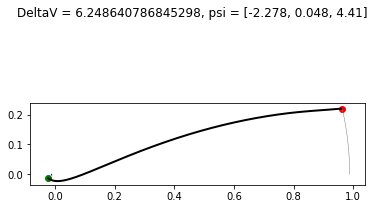

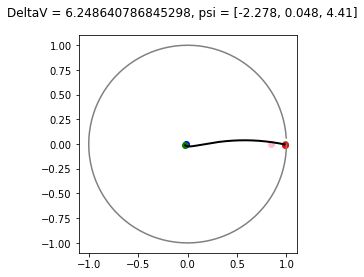

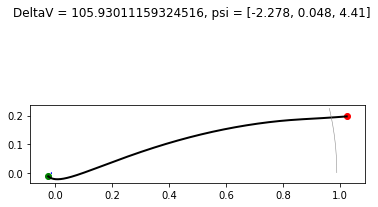

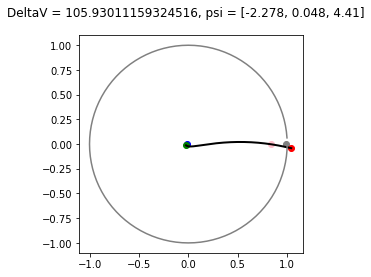

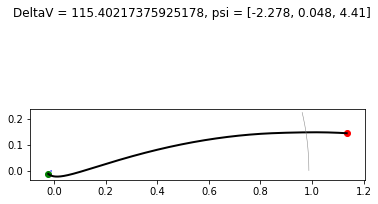

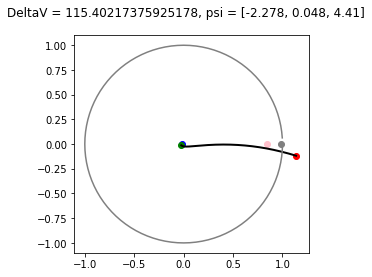

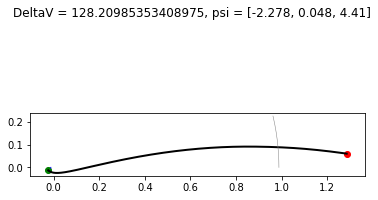

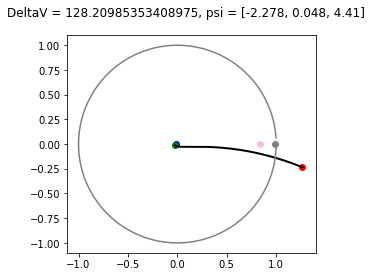

In [26]:
for i in range(len(paths)):
    orbitplot2d(paths[i],psis[i],filepath="./lyapunov_figs/trajectories",title="{title}_{i}")
    orbitplot_non_inertial(paths[i],psis[i],filepath="./lyapunov_figs/trajectories",title="{title}_{i}")

In [ ]:
lyaps=[]
for a in range(N):
    for b in range(N):
        print(f"comparing {a} and {b}")
        if a>=b:
            continue
        lyap=[]
        _a=np.array(paths[a][1]).T
        _b=np.array(paths[b][1]).T
        xas=_a[0]
        yas=_a[1]
        xbs=_b[0]
        ybs=_b[1]
#         hs=(_a[4],_b[4])
        ts=(_a[5],_b[5])
        print(f"length of the trajectory coordinate arrays: {a}: {len(xas)}, {b}: {len(xbs)}")
        
#         ts=[None,None]
#         for l in range(len(hs)):
#             idxs=[]
#             tally=0
#             for i in range(len(hs[l])): # each time step h, check whether the little tally has reached our threshold.
#                 h=hs[l][i]              # if it has, take that index as a time step
#                 tally+=h
#                 if tally>=1.5e-5:
#                     idxs.append(i)
#                     tally=0
#             ts[l] = idxs
            
        _,min_ts = min([(len(x), x) for x in ts])
        print(f"time steps standardized: comparing at {len(min_ts)} points on the trajectory. Last point will be at {max(min_ts)}")
        for idx in range(len(min_ts)):
#             idx=min_ts[i]
            lyap.append(sqrt((xas[idx]-xbs[idx])**2+(yas[idx]-ybs[idx])**2))
        lyaps.append(lyap)
print(len(lyaps))

In [ ]:
loglyaps=[]
for i in range(len(lyaps)):
    lyap=lyaps[i][1:]
    loglyap=[np.log(x) for x in lyap]
    loglyaps.append(loglyap)

In [ ]:
def find_segments(lyap):
    segments=[]
    prev_l = -1e8
    rising = True
    segment=[0]
    for i,l in enumerate(lyap):
        if rising:
            if l<prev_l:
                rising = False
                segment.append(i)
        else:
            if l>prev_l:
                rising = True
                segments.append(segment)
                segment=[i]
        prev_l = l
    if len(segment) == 1:
        segment.append(len(lyap))
    segments.append(segment)
    return segments

In [ ]:
from scipy import stats
def compute_slope(lyap, filepath=".", title="derp"):
    segments=find_segments(lyap)
    plt.plot(range(len(lyap)),lyap,color='grey',alpha=0.5)
    slopes=[]
    for lb, ub in [[int(x),int(y)] for [x,y] in segments]:
        if ub-lb < 100:
            continue
        if ub>len(lyap):
            break
        slope, intercept, r_value, p_value, std_err = stats.linregress(range(lb,ub),lyap[lb:ub])
        slopes.append(slope)
        #print(slope, intercept)
        line=slope*range(lb,ub)+intercept
        plt.plot([lb,ub],[line[0],line[-1]],color='darkred')
        plt.plot(range(lb,ub),lyap[lb:ub],color='teal')
    mean_slope = np.mean(slopes)
    plt.suptitle(f"mean slope = {mean_slope}")
    plt.savefig(f"{filepath}/{title}.pdf")
    plt.clf()
    return mean_slope

In [ ]:
slopes=[]
for i, loglyap in enumerate(loglyaps):
    slopes.append(compute_slope(loglyap,filepath="lyapunov_figs/slopes",title=f"{title}_{i}"))
print(f"mean slope = {np.mean(slopes)}")
    

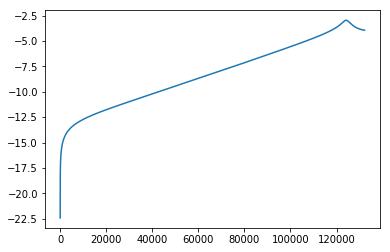

In [11]:
lyap=lyaps[2][1:]
loglyap=[np.log(x) for x in lyap]
plt.plot(range(len(loglyap)),loglyap)

In [100]:
slope, intercept, r_value, p_value, std_err = stats.linregress(range(lb,ub),loglyap[lb:ub])
print(slope, intercept)

3.040160021068095e-06 -4.150509459758794


In [75]:
line=slope*range(lb,ub)+intercept

In [31]:
hs = np.array(paths[0][1]).T[4]

In [32]:
min(hs)

6.778256920031252e-08

In [33]:
max(hs)

5.798294330541472e-05

In [36]:
np.std(hs)

1.0882626399622566e-05

In [38]:
np.mean(hs)

7.04610385050155e-06

In [39]:
np.median(hs)

1.4170823204431882e-06

In [20]:
for i,lyap in enumerate(lyaps):
    print(i)
    print(f"max_dist={max(lyap)}\nmin_dist={min(lyap[1:])}\nmean_dist={np.mean(lyap)}\n")

0
max_dist=0.01751402592237996
min_dist=6.108618321685211e-11
mean_dist=0.0016631918999795389

1
max_dist=0.034854312909910194
min_dist=1.2217237030732077e-10
mean_dist=0.003335222093063135

2
max_dist=0.0519000293085001
min_dist=1.8325855352417288e-10
mean_dist=0.004995049957512303

3
max_dist=0.06856920362650683
min_dist=2.443447375971584e-10
mean_dist=0.006650826275061298

4
max_dist=0.017500735883404728
min_dist=6.108618709046866e-11
mean_dist=0.001658619408135684

5
max_dist=0.03484062469361659
min_dist=1.2217237030732077e-10
mean_dist=0.003313030523126502

6
max_dist=0.05189971901370947
min_dist=1.8325855438030627e-10
mean_dist=0.004964266038107859

7
max_dist=0.09920594419874283
min_dist=6.108618321685211e-11
mean_dist=0.003250986015240398

8
max_dist=0.1623322154574026
min_dist=1.221723672898376e-10
mean_dist=0.006028194553985098

9
max_dist=0.13359498879263762
min_dist=6.10861840729855e-11
mean_dist=0.0037172099328181504



In [2]:
LEO_VELOCITY_NONDIM

7.637415134712152

In [6]:
G

6.67384e-20

In [7]:
UNIT_LENGTH

384400.0

In [8]:
UNIT_VELOCITY

1.0231446033517257

In [11]:
path[1][:10]

[[-0.020532317163607317,
  -0.014769797663478657,
  9.302400979050311,
  -5.289712560652042,
  1e-06,
  0.0],
 [-0.02053173668337765,
  -0.014770126981460232,
  9.302506294991373,
  -5.289526903591223,
  9.721133320604916e-08,
  6.25e-08],
 [-0.020530833802225975,
  -0.01477063917351281,
  9.302670086915608,
  -5.289238127828462,
  9.721047721857834e-08,
  1.5971133320604914e-07],
 [-0.020529930913152982,
  -0.014771151333070694,
  9.30283385971569,
  -5.288949344584076,
  9.720964246538381e-08,
  2.5692181042462746e-07],
 [-0.020529028015963575,
  -0.014771663460245516,
  9.302997613426637,
  -5.288660553797395,
  9.720881005219808e-08,
  3.541314528900113e-07],
 [-0.020528125110638153,
  -0.01477217555504935,
  9.303161348051628,
  -5.288371755463873,
  9.720798103048264e-08,
  4.5134026294220934e-07],
 [-0.020527222197147327,
  -0.014772687617499806,
  9.303325063595612,
  -5.288082949575842,
  9.72071352907864e-08,
  5.48548243972692e-07],
 [-0.020526319275648516,
  -0.014773199647

In [32]:
_,min_ts = min([(len(x), x) for x in [[1,1,1],[2,2,2]]])

In [33]:
min_ts

[1, 1, 1]